In [26]:
import numpy as np
import pandas as pd
import os
np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

data = pd.read_csv('/Users/kimginam/ML-자원개발-머신러닝-입문/Data/titanic.csv')
data.head(10)

,Survived,Sex,Age,SibSp
0,0,0,22.0,1
1,1,1,38.0,1
2,1,1,26.0,0
3,1,1,35.0,1
4,0,0,35.0,0
5,0,0,54.0,0
6,0,0,2.0,3
7,1,1,27.0,0
8,1,1,14.0,1
9,1,1,4.0,1


In [27]:
X_train = data[['Sex', 'Age', 'SibSp']].values
y_train = data[['Survived']].values

from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=10)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [28]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="titanic.dot",
        feature_names=['is male?', 'is age', 'is SibSp'],
        class_names=['died', 'survived'],
        rounded=True,
        filled=True
    )

In [29]:
!dot -Tpng titanic.dot -o titanic.png

In [30]:
tree_clf.predict([[0, 3, 2]])

array([1])

In [31]:
tree_clf.predict_proba([[0, 3, 2]])

array([[0.33333333, 0.66666667]])

In [32]:
tree_clf.tree_.impurity

array([0.49420118, 0.32630148, 0.44444444, 0.29454306, 0.        ])

## Regression

[0, 1, -0.05, 0.25]

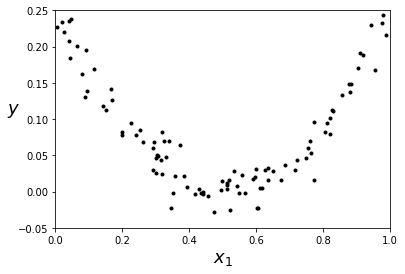

In [33]:
np.random.seed(10)
m = 100
X = np.random.rand(m,1)
y =  (X-0.5)**2 + 0.02* np.random.randn(m, 1)

plt.plot(X, y, 'k.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 1, -0.05, 0.25])

In [34]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=1, random_state=1, presort=True)
tree_reg.fit(X, y)
from sklearn.tree import export_graphviz

export_graphviz(
        tree_reg,
        out_file="regression_tree.dot",
        feature_names=["x1"],
        rounded=True,
        filled=True
    )
!dot -Tpng regression_tree.dot -o regression_tree1.png

/Users/kimginam/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


Text(0.21, 0.15, 'Depth=0')

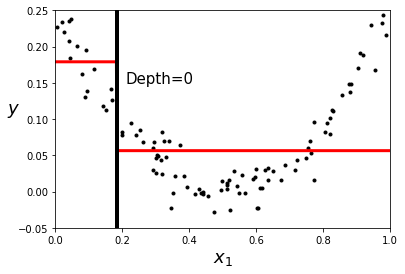

In [35]:
x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred = tree_reg.predict(x1)

plt.plot(X, y, 'k.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 1, -0.05, 0.25])
plt.plot(x1, y_pred, 'r-', linewidth=3)
plt.plot([0.184, 0.184], [-0.05, 0.25], 'k-', linewidth=4)
plt.text(0.21, 0.15, "Depth=0", fontsize=15)

In [36]:
X_sorted = np.sort(X, axis=0)
thresholds = (X_sorted[1:] + X_sorted[:-1])/2

def mse(yy):
    y_mean = np.sum(yy)/len(yy)
    return np.sum((y_mean - yy)**2, axis=0)/len(yy)

Js = []
from itertools import compress
for thresh in thresholds:
    
    left = list(compress(y, X <=thresh))
    
    right =list(compress(y, X >thresh))
    
    mse_left = mse(left)
    mse_right = mse(right)
    
    J = len(left) / len(X) * mse_left + len(right) / len(X) * mse_right
    
    Js.append(J)

Text(0.22, 0.0037, 'minimum cost')

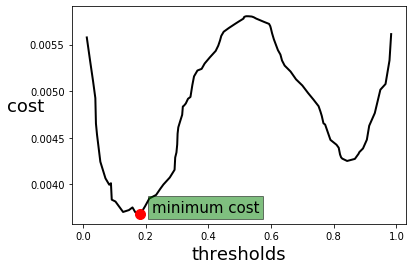

In [37]:
plt.plot(thresholds, Js, 'k', linewidth=2)
plt.xlabel("thresholds", fontsize=18)
plt.ylabel("cost", rotation=0, fontsize=18)
index = np.argmin(Js)
plt.plot(thresholds[index], Js[index], 'ro', markersize=10)
plt.text(0.22, 0.0037, "minimum cost",bbox=dict(facecolor='green', alpha=0.5), fontsize=15)

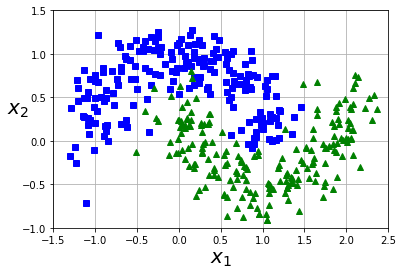

In [38]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=400, noise=0.2, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [39]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 1000)
    x1s = np.linspace(axes[2], axes[3], 1000)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]    
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

In [40]:
theta = np.radians(45)
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s), (s, c)))

X_rotated = X.dot(R)

ValueError: Number of features of the model must match the input. Model n_features is 3 and input n_features is 2 

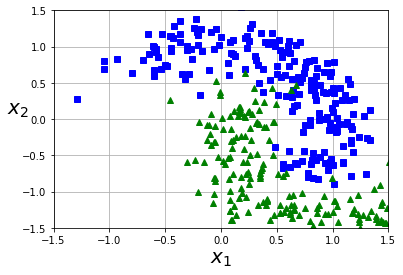

In [41]:
plot_dataset(X_rotated, y,[-1.5, 1.5, -1.5, 1.5])
plot_predictions(tree_clf, [-1.5, 1.5, -1.5, 1.5])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=200, max_leaf_nodes=20, n_jobs=-1, random_state=10)
rnd_clf.fit(X, y)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plot_predictions(rnd_clf, [-1.5, 2.5, -1, 1.5])
plt.title('Random Forest')

## GradientBoosting

[0, 1, -0.05, 0.25]

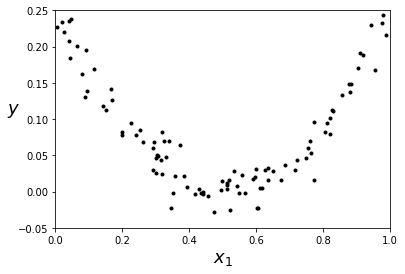

In [42]:
np.random.seed(10)
m = 100
X = np.random.rand(m,1)
y =  (X[:,0]-0.5)**2 + 0.02* np.random.randn(m)

plt.plot(X, y, 'k.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 1, -0.05, 0.25])

In [43]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [44]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [45]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [46]:
X_new = np.linspace(0, 1, 500).reshape(-1, 1)

In [47]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

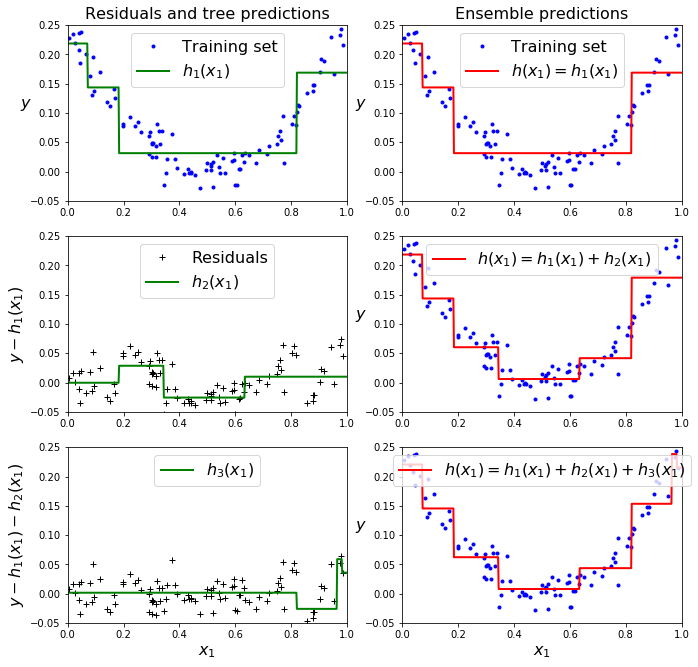

In [48]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[0, 1, -0.05, 0.25], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[0, 1, -0.05, 0.25], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[0, 1, -0.05, 0.25], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[0, 1, -0.05, 0.25], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[0, 1, -0.05, 0.25], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[0, 1, -0.05, 0.25], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

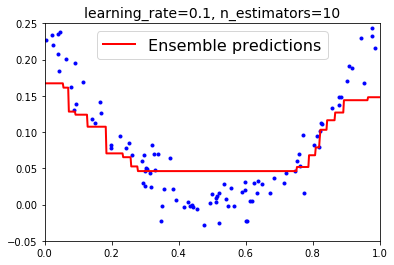

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=10, learning_rate=0.1, random_state=10)
gbrt.fit(X, y)

plt.figure(figsize=(6,4))
plot_predictions([gbrt], X, y, axes=[0, 1, -0.05, 0.25], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)

plt.show()